  ## 1. Introduction

* Project

We aim to develop Python-based data analysis software The goal is to develop software that can analyze Micro Led data in detail.

## 2. Project information
 
    
* **Detailed project**
    
  At first,

  The main task is to receive data from the customer and then receive the request.
 
  Main request 
  + Wafer
  + Die row & colum
  + option
 
  We can analyze the selected data by specifying specific elements In order to develop such analysis software, a black box(software) that implments this function is created to solve the customer's request.

  In the software,
  * We process the raw data and print it out. 
  * We show the processed data as a figure and save the file. 
 
 **You can selectively output only the graph you want.**
 
  Please put the data in the 'dat' folder
  specify the file path
  Run the run.py 

* **Run file description** 

   Data is processed by selecting only files in "dat"
   
   Load the module that processes and fits raw data and the module that makes the data parsed from accel, respectively.

## 3. Install and Run 

 * Getting Stared
    + Entered the Terminal, write down 'pip install -r requirements.txt' and download it. \
 ``pip install -r requirements.txt``


 * How to Run
   + Choose the raw data folder customer want to analyze.


## 4. Description of the module file feature


 ### 1) Fitting module 
 
   * The graph is drawn by parsing the raw data of PL data, EL data in the Accel file.
   * The fitting of parsing a raw data and displays the data value y-axis corresponding to x-axis and stored in the graph to visualize the image.

## 5. Example of analysis result

In [1]:
import os

os.chdir('../')
print(os.getcwd())

C:\Users\ASDL\Desktop\micro_led_analysis


  ❗caution❗
>
> If an error occurs, please refresh the jupyter notebook or restart the kernel 

In [2]:
# 필요한 라이브러리 호출
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_excel('./dat/Ver6.xlsx')  # excel file 불러오기
df.drop(['No',' X Index',' Y Index',' X Size',' Y Size'],axis=1,inplace=True) #불필요한 column 지우기
df['PL JudgeType'].unique()  # PL JudgeType을 고유값으로 설정
for i in range(0,7590):
    if df.loc[i,'PL JudgeType'] == 'PL OK': # PL JudgeType를 1과 0으로 치환
        df.loc[i,'PL JudgeType'] = 1
    else:
        df.loc[i,'PL JudgeType'] = 0

for i in range(0,7590):                   # Itself Judge를 1과 0으로 치환
    if df.loc[i,'Itself Judge'] == 'EL OK':
        df.loc[i,'Itself Judge'] = 1
        df.loc[i,'Error flag'] = 'No error' # Ok일 경우 Error Flag column에 No error를 출력
    else:
        df.loc[i,'Error flag'] = df.loc[i,'Itself Judge'] # Error 발생 시 Effor flage에 Error 문구 출력
        df.loc[i,'Itself Judge'] = 0

df.to_excel('./dat/Ver6_substitution.xlsx') # 치환된 excel 파일 저장

In [4]:
df_1 = pd.read_excel('./dat/Ver6_substitution.xlsx') # 치환된 excel 파일 불러오기
df_1.drop(['Unnamed: 0',' PL_Min Value','Error flag'],axis=1,inplace=True) #불필요한 column 지우기
df_1['PL JudgeType'].unique()   # PL JudgeType을 고유값으로 설정

array([1, 0], dtype=int64)

In [5]:
df_1.corr() # 각 Column 별 상관관계 파악

,PL JudgeType,PL_Sum,PL_Average,PL_Max Value,EL_PW,EL_PI,EL_DW,EL_II,EL_FWHM,EL_IR(A),EL_VR(V),EL_VF1(V),EL_VF2(V),EL_VF3(V),EL_PO-Top(W),Itself Judge
PL JudgeType,1.000000,0.221748,0.217961,0.316268,0.091623,0.086054,0.011777,0.071894,0.098022,0.428941,0.008965,-0.007796,-0.004805,-0.002067,0.125642,0.109088
PL_Sum,0.221748,1.000000,0.988944,0.872823,-0.076567,-0.061167,-0.038001,-0.017079,-0.013838,0.229400,-0.092440,0.178227,0.180804,0.161638,0.119837,-0.093483
PL_Average,0.217961,0.988944,1.000000,0.861703,-0.075193,-0.060099,-0.035753,-0.015862,-0.013066,0.228208,-0.088929,0.176178,0.179227,0.160318,0.116901,-0.093022
PL_Max Value,0.316268,0.872823,0.861703,1.000000,-0.033593,-0.004186,-0.025751,0.045088,0.049945,0.294392,-0.093397,0.133408,0.136986,0.119904,0.151975,-0.046161
EL_PW,0.091623,-0.076567,-0.075193,-0.033593,1.000000,0.287047,0.180358,0.238506,0.342468,0.145804,0.039377,-0.346514,-0.349235,-0.329754,0.317766,0.333204
EL_PI,0.086054,-0.061167,-0.060099,-0.004186,0.287047,1.000000,0.409502,0.957829,0.788333,0.098191,0.059557,-0.738194,-0.741803,-0.723021,0.707122,0.703333
EL_DW,0.011777,-0.038001,-0.035753,-0.025751,0.180358,0.409502,1.000000,0.346822,0.483469,0.058521,0.044171,-0.486118,-0.493530,-0.482793,0.452881,0.459372
EL_II,0.071894,-0.017079,-0.015862,0.045088,0.238506,0.957829,0.346822,1.000000,0.774099,0.080066,0.036717,-0.609508,-0.610494,-0.592949,0.574392,0.573297
EL_FWHM,0.098022,-0.013838,-0.013066,0.049945,0.342468,0.788333,0.483469,0.774099,1.000000,0.113489,0.041093,-0.826021,-0.825207,-0.809495,0.814380,0.769941
EL_IR(A),0.428941,0.229400,0.228208,0.294392,0.145804,0.098191,0.058521,0.080066,0.113489,1.000000,0.046047,0.086238,0.094179,0.097118,0.114730,0.112333


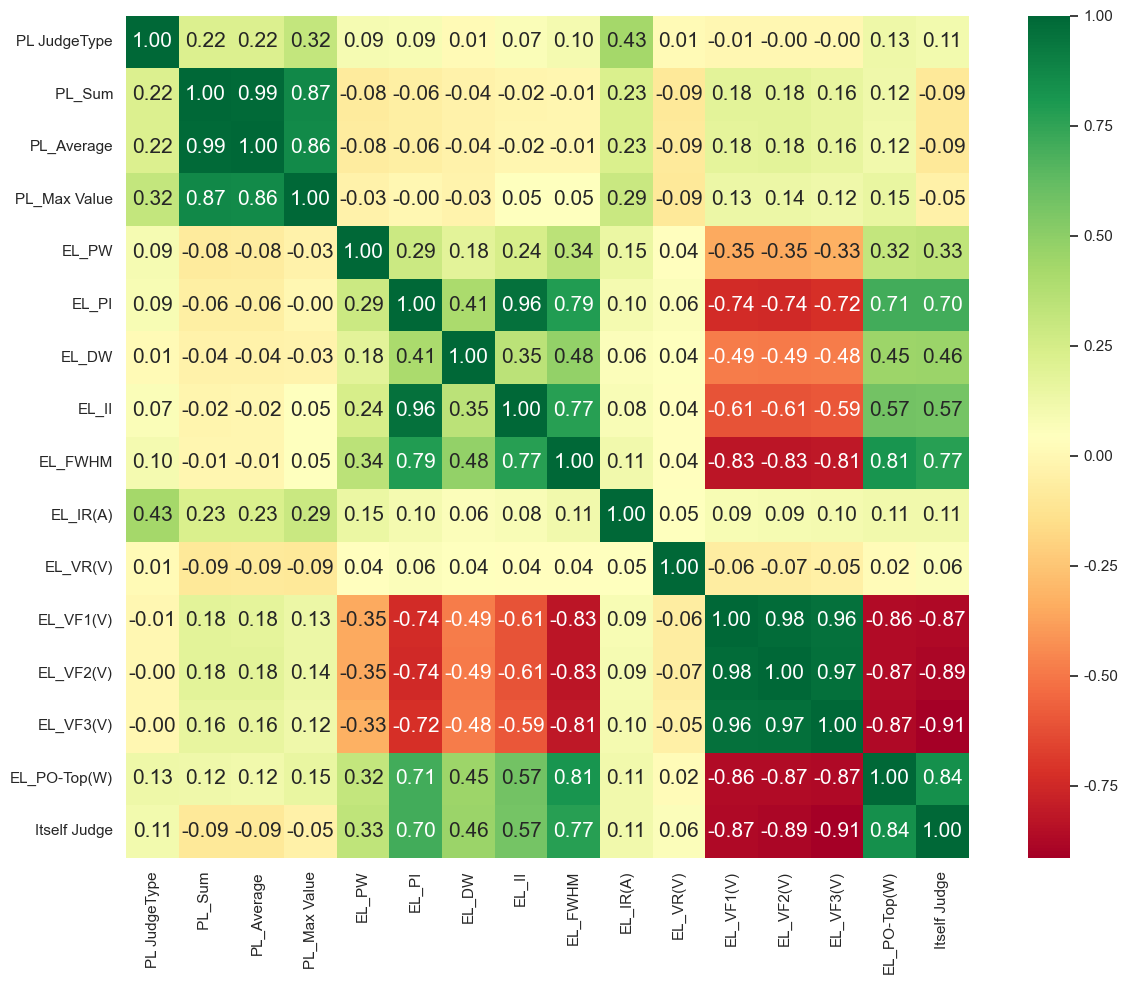

In [6]:
#각 Column별 상관관계 시각화
cols = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
corr = df_1[cols].corr(method = 'pearson') # 피어슨 상관계수 메소드를 사용하여 상관관계 설정

corr.values
column_names = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
sns.set(font_scale=1,rc={"axes.unicode_minus":False})
plt.figure(figsize = (13,10))
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names, #y축에 컬럼명 출력
            xticklabels=column_names, #x축에 컬럼명 출력
            cmap="RdYlGn") 
plt.tight_layout()
plt.show()

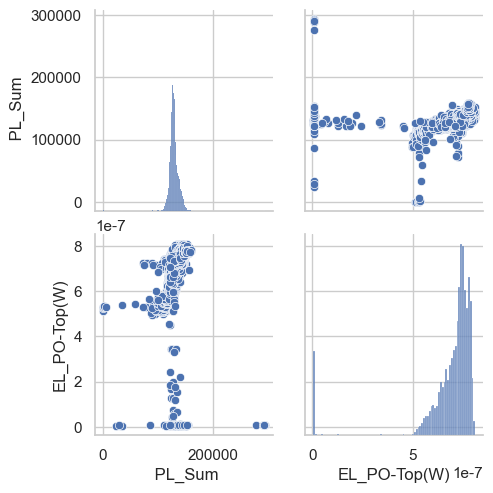

In [7]:
sns.set(style='whitegrid') 
sns.pairplot(df_1[[' PL_Sum','EL_PO-Top(W)']]) # 'PL_Sum'과 'EL_P0-Top(W)' 사이의 상관관계 그래프로 나타내기
plt.show()

In [8]:
# PL_Sum과 EL_P0-Top(W)와의 상관관계식 =>  EL_P0-Top(W) = (7E-12 * df['PL_Sum'] - 2.5E-7)
EL_P0_Top1 = (7E-12 * df[' PL_Sum'] - 2.5E-7)

# 필터링 된 데이터 값 넣을 리스트 만들어 주기
EL_P0_Top = []  
re_EL_P0_Top = []
PL_JudgeType = []
PL_Sum = []
PL_Average = []
PL_Max_Value = []
EL_PW = []
EL_PI = []
EL_DW = []
EL_II = []
EL_FWHM = []
EL_IR = []
EL_VR = []
EL_VF1 = []
EL_VF2 = []
EL_VF3 = []
Itself_Judge = []

for i in range(0,7590):   # 필터링 된 데이터들 리스트에 넣어주기
    if 1.2E-6 > EL_P0_Top1[i] > 0.4E-6 and df['EL_PO-Top(W)'][i] > 4E-7:  # 필터링 값
        re_EL_P0_Top.append(EL_P0_Top1[i])
        EL_P0_Top.append(df['EL_PO-Top(W)'][i])
        PL_JudgeType.append(df['PL JudgeType'][i])
        PL_Sum.append(df[' PL_Sum'][i])
        PL_Average.append(df['PL_Average'][i])
        PL_Max_Value.append(df['PL_Max Value'][i])
        EL_PW.append(df['EL_PW'][i])
        EL_PI.append(df['EL_PI'][i])
        EL_DW.append(df['EL_DW'][i])
        EL_II.append(df['EL_II'][i])
        EL_FWHM.append(df['EL_FWHM'][i])
        EL_IR.append(df['EL_IR(A)'][i])
        EL_VR.append(df['EL_VR(V)'][i])
        EL_VF1.append(df['EL_VF1(V)'][i])
        EL_VF2.append(df['EL_VF2(V)'][i])
        EL_VF3.append(df['EL_VF3(V)'][i])
        Itself_Judge.append(df['Itself Judge'][i])

All = [PL_JudgeType ,PL_Sum ,PL_Average ,PL_Max_Value ,EL_PW, EL_PI,EL_DW, EL_II ,EL_FWHM 
,EL_IR,EL_VR,EL_VF1,EL_VF2,EL_VF3,EL_P0_Top ,Itself_Judge]

In [9]:
# 필터링 된 데이터들 가지고 새로운 데이터 프레임 만들어주기
new_df = pd.DataFrame({'PL JudgeType' : All[0] ,
                      'PL_Sum' : All[1],
                      'PL_Average' : All[2],
                      'PL_Max Value' : All[3],
                      'EL_PW' : All[4],
                      'EL_PI' : All[5],
                      'EL_DW' : All[6],
                      'EL_II' : All[7],
                      'EL_FWHM' : All[8],
                      'EL_IR(A)' : All[9],
                      'EL_VR(V)' : All[10],
                      'EL_VF1(V)' : All[11],
                      'EL_VF2(V)' : All[12],
                      'EL_VF3(V)' : All[13],
                      'EL_PO-Top(W)' : All[14],
                      'Itself Judge' : All[15]})

In [10]:
new_df.corr() # 새로운 데이터 프레임 각 Column 별 상관관계 파악

,PL JudgeType,PL_Sum,PL_Average,PL_Max Value,EL_PW,EL_PI,EL_DW,EL_II,EL_FWHM,EL_IR(A),EL_VR(V),EL_VF1(V),EL_VF2(V),EL_VF3(V),EL_PO-Top(W),Itself Judge
PL JudgeType,1.000000,0.029689,0.029554,0.026907,-0.007487,0.009479,-0.020527,0.002707,-0.008606,-0.000413,-0.001426,0.005530,0.004960,0.003538,0.032289,-0.001902
PL_Sum,0.029689,1.000000,0.979881,0.834388,-0.594668,0.062647,-0.670310,0.106099,0.313958,0.024208,-0.113329,0.066440,0.084613,-0.027018,0.706184,0.024382
PL_Average,0.029554,0.979881,1.000000,0.816780,-0.578328,0.062710,-0.652375,0.106024,0.308907,0.023061,-0.107675,0.062360,0.081362,-0.027121,0.686479,0.022125
PL_Max Value,0.026907,0.834388,0.816780,1.000000,-0.449711,0.086109,-0.511315,0.145146,0.334367,0.026323,-0.122845,0.048926,0.070896,-0.033438,0.618133,0.009288
EL_PW,-0.007487,-0.594668,-0.578328,-0.449711,1.000000,-0.176168,0.780740,-0.115768,-0.092294,0.009711,0.101443,0.003477,-0.022813,0.113034,-0.743589,-0.061444
EL_PI,0.009479,0.062647,0.062710,0.086109,-0.176168,1.000000,0.058247,0.951600,0.360006,-0.026275,-0.003322,-0.010175,-0.006728,0.024476,-0.021880,0.009112
EL_DW,-0.020527,-0.670310,-0.652375,-0.511315,0.780740,0.058247,1.000000,0.193969,0.266660,0.007335,0.097648,-0.002274,-0.014418,0.134929,-0.839404,-0.084207
EL_II,0.002707,0.106099,0.106024,0.145146,-0.115768,0.951600,0.193969,1.000000,0.606704,-0.019637,-0.019578,0.001399,0.018703,0.040369,-0.046669,-0.019644
EL_FWHM,-0.008606,0.313958,0.308907,0.334367,-0.092294,0.360006,0.266660,0.606704,1.000000,-0.004025,-0.076830,0.028487,0.076132,0.026873,0.099089,-0.064030
EL_IR(A),-0.000413,0.024208,0.023061,0.026323,0.009711,-0.026275,0.007335,-0.019637,-0.004025,1.000000,0.022060,0.079228,0.026010,0.004946,-0.007649,-0.001897


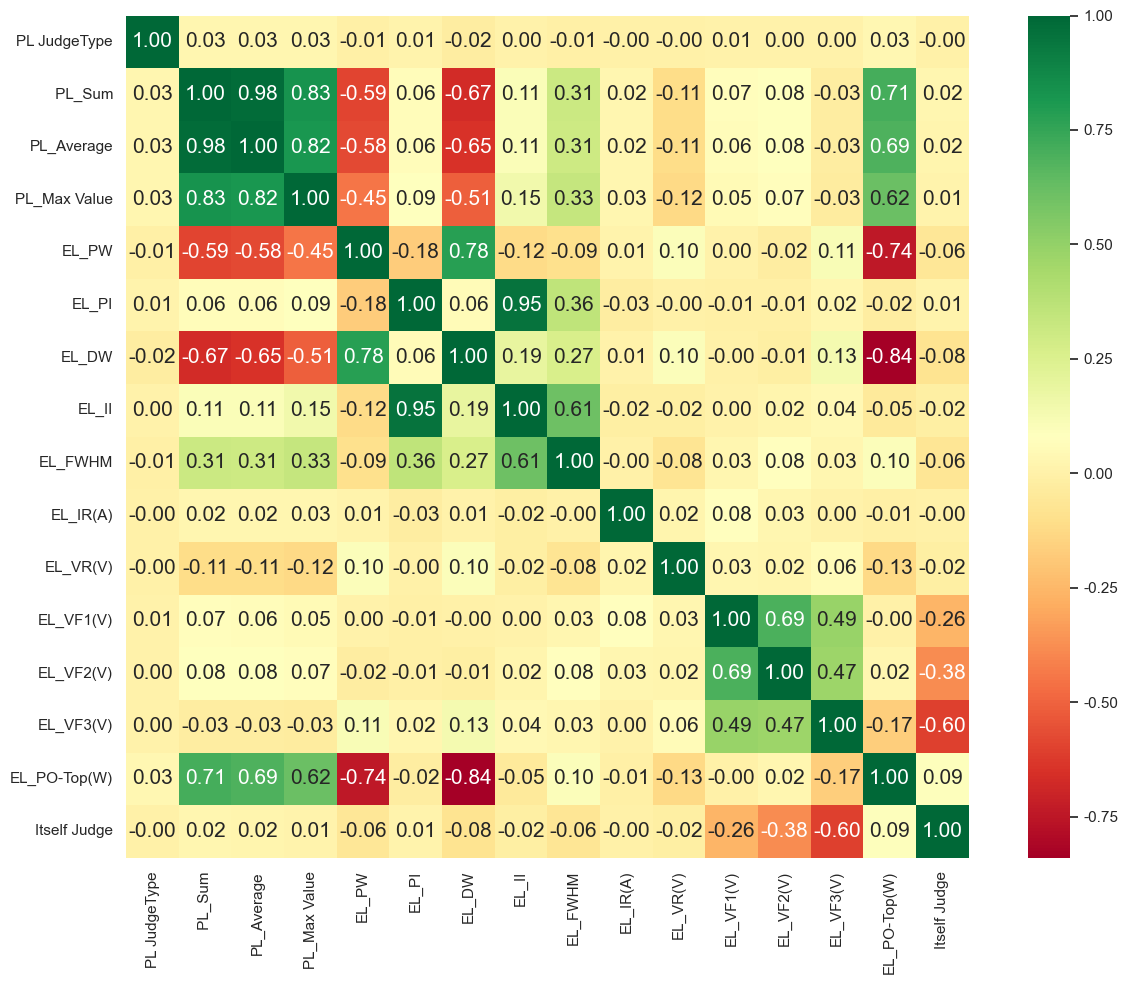

In [11]:
#새로운 데이터 프레임 각 Column별 상관관계 시각화
cols = ['PL JudgeType','PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
corr = new_df[cols].corr(method = 'pearson') # 피어슨 상관계수 메소드를 사용하여 상관관계 설정

corr.values
column_names = ['PL JudgeType',' PL_Sum','PL_Average','PL_Max Value','EL_PW','EL_PI','EL_DW','EL_II','EL_FWHM','EL_IR(A)','EL_VR(V)','EL_VF1(V)','EL_VF2(V)','EL_VF3(V)','EL_PO-Top(W)','Itself Judge']
sns.set(font_scale=1,rc={"axes.unicode_minus":False})
plt.figure(figsize = (13,10))
hm = sns.heatmap(corr.values, #데이터
            cbar=True, #오른쪽 컬러 막대 출력 여부
            annot=True, #차트에 숫자를 보여줄 것인지 여부
            square=True, #차트를 정사각형으로 할 것인지
            fmt='.2f', #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=column_names, #y축에 컬럼명 출력
            xticklabels=column_names, #x축에 컬럼명 출력
            cmap="RdYlGn") 
plt.tight_layout()
plt.show()

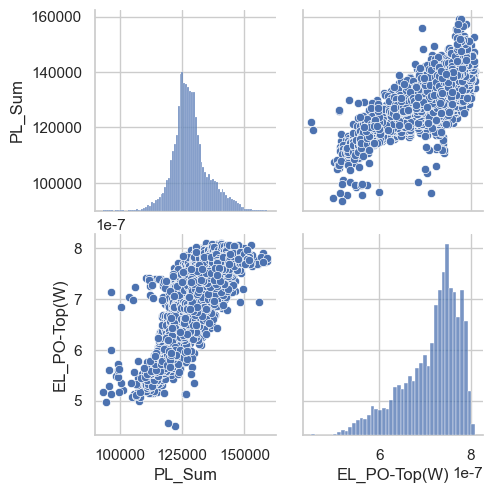

In [12]:
sns.set(style='whitegrid') 
sns.pairplot(new_df[['PL_Sum','EL_PO-Top(W)']]) # 'PL_Sum'과 'EL_P0-Top(W)' 사이의 상관관계 그래프로 나타내기
plt.show()